In [2]:
import sys

print(sys.version)
import os
print(os.path.abspath('.'))
%matplotlib inline 
import io 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
from fitter import Fitter
import matplotlib 
import matplotlib.pyplot as plt 

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0) 

matplotlib.style.use('ggplot')

# 让notebook宽屏显示
from IPython.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))


3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
D:\liing\Mynote\notebook\mycode


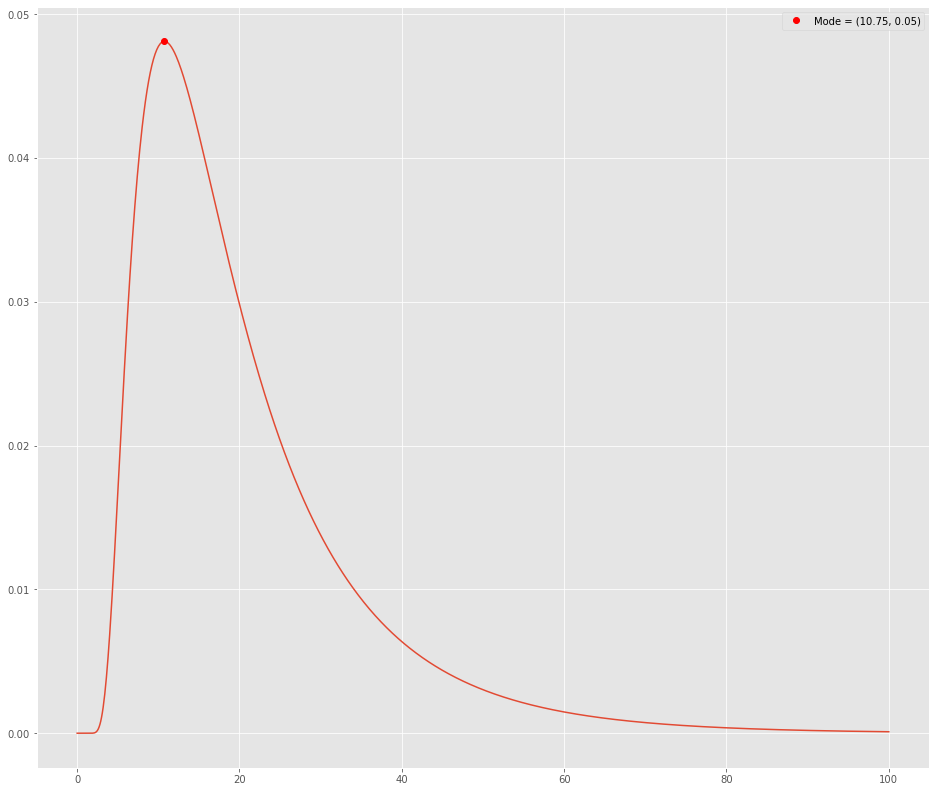

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss
from scipy.optimize import minimize_scalar

# 定义 invgauss 分布的参数
mu = 1  # 形状参数
loc = 0  # 位置参数
scale = 1  # 尺度参数
mu, loc, scale = 0.4856500576494863, 0.5128946812111822, 41.435767191284285

# 创建 invgauss 分布对象
dist = invgauss(mu, loc=loc, scale=scale)

# 定义概率密度函数
pdf = lambda x: dist.pdf(x)

# 使用 minimize_scalar 函数寻找概率密度函数的峰值点（众数）
bound_min = 0
bound_max = 100
res = minimize_scalar(lambda x: -pdf(x), bounds=(bound_min, bound_max), method='bounded')
mode_x = res.x
mode_y = pdf(mode_x)

# 绘制概率密度函数和峰值点
x = np.linspace(0, bound_max, 1000)
y = pdf(x)
plt.plot(x, y)
plt.plot(mode_x, mode_y, 'ro', label=f'Mode = ({mode_x:.2f}, {mode_y:.2f})')
plt.legend()
plt.show()


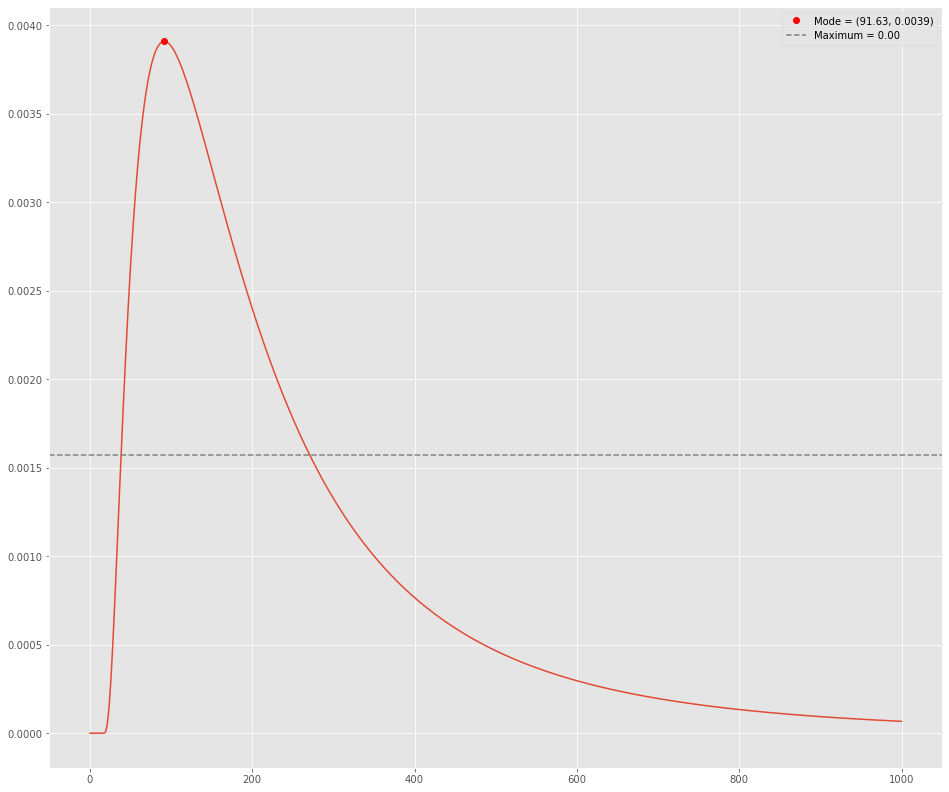

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.optimize import minimize_scalar

# 定义 lognorm 分布的参数
s = 0.5  # 形状参数
loc = 0  # 位置参数
scale = 1  # 尺度参数
s, loc, scale = 0.9, 16, 170                     # 峰值 100  0.0045 min 17  max 6000以上  2023-02-15调


# 创建 lognorm 分布对象
dist = lognorm(s, loc=loc, scale=scale)

# 定义概率密度函数
pdf = lambda x: dist.pdf(x)

# 计算概率密度函数的最大值（峰值）
max_y = pdf(dist.mean())

# 使用 minimize_scalar 函数寻找概率密度函数的峰值点（众数）
bound_min = 0
bound_max = 1000
res = minimize_scalar(lambda x: -pdf(x), bounds=(bound_min, bound_max), method='bounded')
mode_x = res.x
mode_y = pdf(mode_x)

# 绘制概率密度函数和峰值点
x = np.linspace(0, bound_max, 1000)
y = pdf(x)
plt.plot(x, y)
plt.plot(mode_x, mode_y, 'ro', label=f'Mode = ({mode_x:.2f}, {mode_y:.4f})')
plt.axhline(max_y, linestyle='--', color='gray', label=f'Maximum = {max_y:.2f}')
plt.legend()
plt.show()



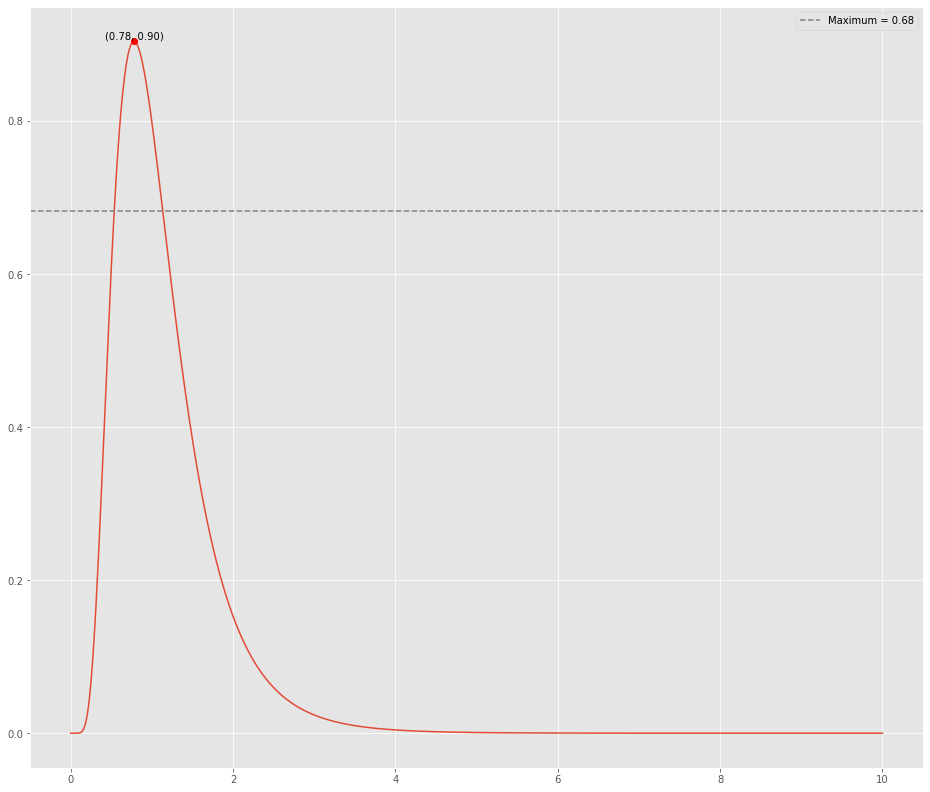

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.optimize import minimize_scalar

# 定义 lognorm 分布的参数
s = 0.5  # 形状参数
loc = 0  # 位置参数
scale = 1  # 尺度参数

# 创建 lognorm 分布对象
dist = lognorm(s, loc=loc, scale=scale)

# 定义概率密度函数
pdf = lambda x: dist.pdf(x)

# 计算概率密度函数的最大值（峰值）
max_y = pdf(dist.mean())

# 使用 minimize_scalar 函数寻找概率密度函数的峰值点（众数）
res = minimize_scalar(lambda x: -pdf(x), bounds=(0, 10), method='bounded')
mode_x = res.x
mode_y = pdf(mode_x)

# 绘制概率密度函数和峰值点
x = np.linspace(0, 10, 1000)
y = pdf(x)
plt.plot(x, y)
plt.plot(mode_x, mode_y, 'ro')
plt.text(mode_x, mode_y, f'({mode_x:.2f}, {mode_y:.2f})', ha='center', va='bottom')
plt.axhline(max_y, linestyle='--', color='gray', label=f'Maximum = {max_y:.2f}')
plt.legend()
plt.show()


Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.06it/s]


{'lognorm': {'s': 0.49401048083563703, 'loc': 0.009926112736323212, 'scale': 0.984177704040476}}


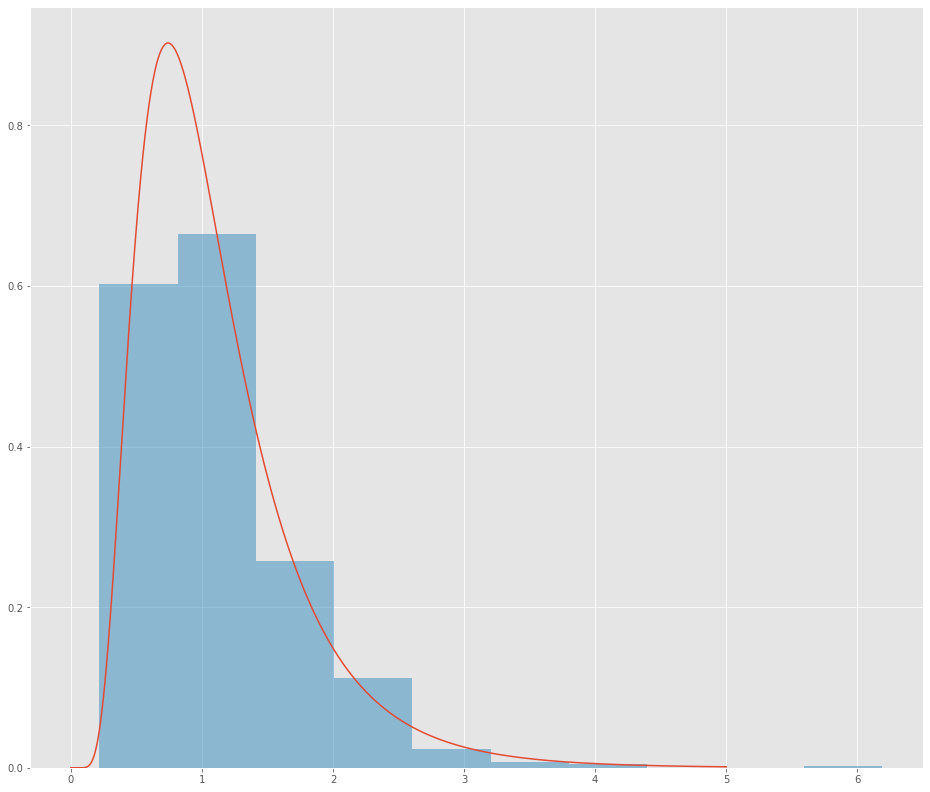

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter
from scipy.stats import lognorm

# 生成一些随机数据
data = lognorm.rvs(s=0.5, loc=0, scale=1, size=1000)

# 使用 fitter 库拟合数据
fit = Fitter(data, distributions=['lognorm'])
fit.fit()

# 打印最适合的分布类型及其参数
print(fitter.get_best())

# 创建 lognorm 分布对象并绘制概率密度函数
dist = lognorm(s=fit.get_best()['lognorm']['s'], loc=fit.get_best()['lognorm']['loc'], scale=fit.get_best()['lognorm']['scale'])
x = np.linspace(0, 5, 1000)
y = dist.pdf(x)
plt.plot(x, y)

# 绘制直方图
plt.hist(data, density=True, alpha=0.5)

plt.show()
